In [1]:
import pandas as pd

# df = pd.read_csv('docked/ugis.csv')
# df = df.sort_values('dock_score')

# print(df)
df = pd.read_csv('ugis_processed_new.csv')
# y = df['dock_score'].to_numpy()
print(df.head())

                                              smiles  dock_score
0  O=C(NC1CCOCC1)C(c1cncnc1)N(C(=O)c1csnn1)C1CCN(...   -8.543447
1  CCC(C)NC(=O)C(c1cccnc1)N(C(=O)c1csnn1)C1CCN(c2...   -8.369246
2  COc1ccc(NC(=O)C(c2cccnc2)N(C(=O)c2csnn2)C2CCN(...   -8.295685
3  CCNC(=O)C(c1cccnc1)N(C(=O)c1c[nH]c(=O)cn1)c1cn...   -8.233845
4  O=C(NC1CC1)C(c1cccnc1)N(C(=O)c1cscn1)c1cn(Cc2c...   -8.171776


Text(0.5, 0.98, 'Ugi Dock Score Histogram')

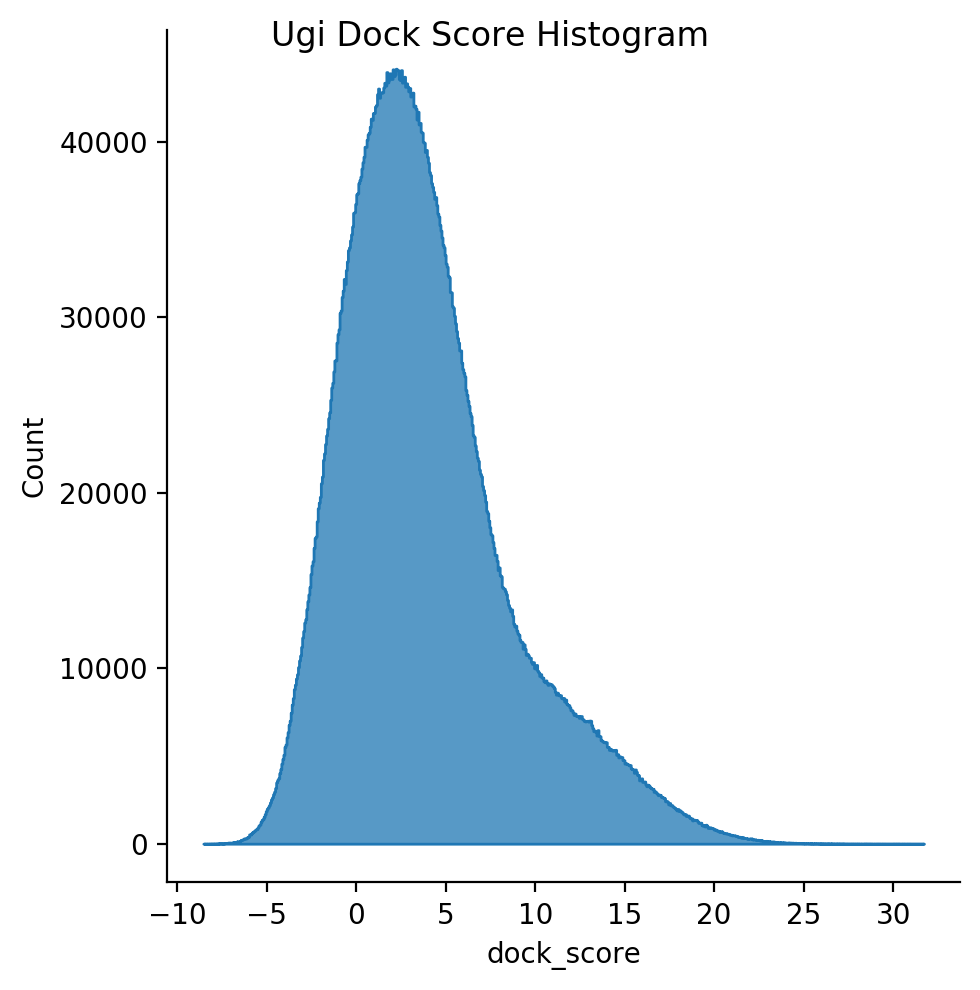

In [2]:
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

plt = sns.displot(df.dock_score, element="step")
plt.fig.suptitle('Ugi Dock Score Histogram')

In [8]:
df = df[df['dock_score']<1e38]

# df.to_csv('docked/ugis_processed.csv', index=False)

                                                    smiles  dock_score
0        O=C(NC1CCOCC1)C(c1cncnc1)N(C(=O)c1csnn1)C1CCN(...   -8.543447
1        CCC(C)NC(=O)C(c1cccnc1)N(C(=O)c1csnn1)C1CCN(c2...   -8.369246
2        COc1ccc(NC(=O)C(c2cccnc2)N(C(=O)c2csnn2)C2CCN(...   -8.295685
3        CCNC(=O)C(c1cccnc1)N(C(=O)c1c[nH]c(=O)cn1)c1cn...   -8.233845
4        O=C(NC1CC1)C(c1cccnc1)N(C(=O)c1cscn1)c1cn(Cc2c...   -8.171776
...                                                    ...         ...
7493736  CCc1nc(-c2nnc[nH]2)sc1C(=O)N(c1ccc(OC2CCOC2)cc...   30.504816
7493737  COC(=O)C1CC(NC(=O)C(c2cnc(N3CC[NH+](C)CC3)nc2)...   30.559759
7493738  Cn1c(=O)[nH]c(=O)c2ccc(C(=O)N(c3cnc(C(C)(C)O)c...   30.834232
7493739  COC(=O)C1CC(NC(=O)C(c2cnc(N3CC[NH+](C)CC3)nc2)...   30.898411
7493740  COC(=O)C1CC(NC(=O)C(c2cnc(N3CCOCC3)nc2)N(C(=O)...   31.721725

[7493741 rows x 2 columns]


In [ ]:
import numpy as np
from scipy.stats import spearmanr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y = df['dock_score'].values
y_mean = np.mean(y)

print(mean_squared_error(y_mean*np.ones_like(y),y))
print(r2_score(y,y_mean*np.ones_like(y)))
print(spearmanr(y,y_mean*np.ones_like(y))[0])

In [5]:
import pandas as pd
from tqdm import tqdm
from rdkit import Chem

df = pd.read_csv('docked/ugis-00000000.can', delim_whitespace=True, 
                 header=None, names=['smiles','name','dock_score'], usecols=[0,2])

def remove_chirality(row):
    mol = Chem.MolFromSmiles(row['smiles'])
    Chem.RemoveStereochemistry(mol)
    row['smiles'] = Chem.MolToSmiles(mol)
    return row

tqdm.pandas()
df = df.progress_apply(remove_chirality, axis=1)
df.to_csv('docked/ugis-00000000.smi', index=False)

100%|██████████| 6954/6954 [00:04<00:00, 1468.45it/s]


In [3]:
# df = pd.read_csv('docked/ugis.csv')
df = pd.read_csv('docked2/ugis.csv', names = ['smiles','dock_score'])
df = df[df['dock_score']<1e38]

df = df.sort_values('dock_score')
print(df)
# print(len(df))
df.drop_duplicates('smiles', keep='first', inplace=True)
print(len(df))
# df.to_csv('docked/ugis_processed.csv', index=False)
df.to_csv('docked2/ugis_processed.csv', index=False)

                                                  smiles  dock_score
14648  Cc1c(N2CCOCC2)cccc1N(C(=O)c1c[nH]cn1)C(C(=O)NC...   -7.187255
18570  O=C(NCCc1cccc(F)c1)C(c1cccnc1)N(C(=O)c1c[nH]cn...   -7.135710
20490  O=C(NCCc1cccc(F)c1)C(c1cccnc1)N(C(=O)c1cnc[nH]...   -6.977703
20498  O=C(NCCc1cccc(F)c1)C(c1cccnc1)N(C(=O)c1c[nH]cn...   -6.885933
18530  Cc1ccc(N2CCCS2(=O)=O)cc1N(C(=O)c1c[nH]cn1)C(C(...   -6.769801
...                                                  ...         ...
1191   CC(C)Oc1ccc(N(C(=O)c2c[nH]cn2)C(C(=O)NCCc2ccc(...   17.396297
2109   CC(C)Oc1ccc(N(C(=O)c2cnc[nH]2)C(C(=O)NCCc2ccc(...   18.117376
1547   CCNS(=O)(=O)c1ccc(CCNC(=O)C(c2cccnc2)N(C(=O)c2...   18.419895
1531   CC(C)Oc1ccc(N(C(=O)c2c[nH]cn2)C(C(=O)NCCc2ccc(...   19.048798
1853   CC(C)Oc1ccc(N(C(=O)c2c[nH]cn2)C(C(=O)NCCc2cc(-...   19.190245

[20773 rows x 2 columns]
9480


In [14]:
df2 = pd.read_csv('total_ugi_library.csv')
print(df2.head())

   Unnamed: 0                                             SMILES
0           0  0,CNC(=O)C(c1cnccc1C)N(C(=O)c1ccns1)c1ccc(C(F)...
1           1  1,CCC(C)NC(=O)C(c1cnccc1C)N(C(=O)c1ccns1)c1ccc...
2           2  2,COCCCNC(=O)C(c1cnccc1C)N(C(=O)c1ccns1)c1ccc(...
3           3  3,Cc1ccncc1C(C(=O)NCc1cccnc1)N(C(=O)c1ccns1)c1...
4           4  4,COC(=O)C(C)NC(=O)C(c1cnccc1C)N(C(=O)c1ccns1)...


In [25]:
def remove_crap(row):
    row['SMILES'] = row['SMILES'][2:]
    return row

tqdm.pandas()
# df2 = df2.progress_apply(remove_crap, axis=1)
print(df2['smiles'].head(n=-20))

0           CNC(=O)C(c1cnccc1C)N(C(=O)c1ccns1)c1ccc(C(F)(F...
1           CCC(C)NC(=O)C(c1cnccc1C)N(C(=O)c1ccns1)c1ccc(C...
2           COCCCNC(=O)C(c1cnccc1C)N(C(=O)c1ccns1)c1ccc(C(...
3           Cc1ccncc1C(C(=O)NCc1cccnc1)N(C(=O)c1ccns1)c1cc...
4           COC(=O)C(C)NC(=O)C(c1cnccc1C)N(C(=O)c1ccns1)c1...
                                  ...                        
17308495    OCC(O)CN1CCN(C(=O)C(c2cncnc2)N(C(=O)c2cnc[nH]2...
17308496    (=O)(=O)CC1CCN(C(=O)C(c2cncnc2)N(C(=O)c2cnc[nH...
17308497    C(C(c1cncnc1)N(C(=O)c1cnc[nH]1)c1ccn(-c2ccccc2...
17308498    (=O)(=O)C1CCN(C(=O)C(c2cncnc2)N(C(=O)c2cnc[nH]...
17308499    C(C(c1cncnc1)N(C(=O)c1cnc[nH]1)c1ccn(-c2ccccc2...
Name: smiles, Length: 17308500, dtype: object


In [19]:
#df2 = df2.rename(columns={'SMILES': 'smiles'})
df2['smiles'].to_csv('total_ugi_library.csv', index=False)

In [21]:
print(df.head())
df['smiles'].to_csv('docked/ugis_processed_smiles.csv', index=False)

                                                     smiles  dock_score
3097041   O=C(NC1CCOCC1)C(c1cncnc1)N(C(=O)c1csnn1)C1CCN(...   -8.543447
3233560   CCC(C)NC(=O)C(c1cccnc1)N(C(=O)c1csnn1)C1CCN(c2...   -8.369246
3232764   COc1ccc(NC(=O)C(c2cccnc2)N(C(=O)c2csnn2)C2CCN(...   -8.295685
38155190  CCNC(=O)C(c1cccnc1)N(C(=O)c1c[nH]c(=O)cn1)c1cn...   -8.233845
9199763   O=C(NC1CC1)C(c1cccnc1)N(C(=O)c1cscn1)c1cn(Cc2c...   -8.171776


In [14]:
import pandas as pd
from tqdm import tqdm

from rdkit import Chem
from rdkit.Chem import rdChemReactions

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') # removes annoying RDKit warnings

df = pd.read_csv('ugis_processed_new.csv')

ugi_decomp = '[*:1][C](=[O])[N]([*:2])[C]([*:3])([*:4])[C](=[O])[N]([#1])[*:5]>>[#6:1][C](=[O])[O][#1].[#6:2][N]([#1])[#1].[#6:3][C](=[O])[#1:4].[#6:5][N+]#[C-]'
rxn = rdChemReactions.ReactionFromSmarts(ugi_decomp)


patts = ['NCC(=O)@[Nr5](!@C)@C',
         'C(=O)@[Nr5]',
         '[CR](=O)@[NR]CC(=O)N',
         'C(=O)NC[CR](=O)[NR]'
        ]

patts = [Chem.MolFromSmarts(x) for x in patts]

def decompose_ugi(row):
    row['mask'] = True
    mol = Chem.MolFromSmiles(row['smiles'])

    reactant = (Chem.AddHs(mol),)

    parts = rxn.RunReactants(reactant)
    c = []
    for part in parts:
        for j in part:
            try:
                x = Chem.MolToSmiles(Chem.RemoveHs(j))
                if x not in c:
                    c.append(x)
            except:
                continue

    if len(c)!=4:
        row['mask'] = False

    else:
        row['acid'] = c[0]
        row['amine'] = c[1]
        row['aldehyde'] = c[2]
        row['isocyanide'] = c[3]
    return row

def decompose_array(smiles_list):
    comps = [None]*len(smiles_list)
    
    for i,smi in tqdm(enumerate(smiles_list), total=len(smiles_list)):
        mol = Chem.MolFromSmiles(smi)

        reactant = (Chem.AddHs(mol),)

        parts = rxn.RunReactants(reactant)
        c = []
        for part in parts:
            for j in part:
                try:
                    x = Chem.MolToSmiles(Chem.RemoveHs(j))
                    if x not in c:
                        c.append(x)
                except:
                    continue

        if len(c)==4:
            comps[i] = c
    
    return comps

tqdm.pandas()
# TEST
df = df.iloc[:1000]

df['comps'] = decompose_array(df['smiles'])

#df = df.progress_apply(decompose_ugi, axis=1)
#df = df[df['mask']]

100%|██████████| 1000/1000 [00:01<00:00, 732.48it/s]


In [ ]:
print(df)
df = df[df['comps'].notnull()]
print(df)
df[['acid', 'amine', 'aldehyde', 'isocyanide']] = pd.DataFrame(df.comps.tolist(), index= df.index)

print(df.head())

In [ ]:
from tqdm import tqdm

from rdkit import Chem
from rdkit.Chem import rdChemReactions

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') # removes annoying RDKit warnings

df = pd.read_csv('ugis_processed_new.csv')

ugi_decomp = '[*:1][C](=[O])[N]([*:2])[C]([*:3])([*:4])[C](=[O])[N]([#1])[*:5]>>[#6:1][C](=[O])[O][#1].[#6:2][N]([#1])[#1].[#6:3][C](=[O])[#1:4].[#6:5][N+]#[C-]'
rxn = rdChemReactions.ReactionFromSmarts(ugi_decomp)


patts = ['NCC(=O)@[Nr5](!@C)@C',
         'C(=O)@[Nr5]',
         '[CR](=O)@[NR]CC(=O)N',
         'C(=O)NC[CR](=O)[NR]'
        ]

patts = [Chem.MolFromSmarts(x) for x in patts]

def decompose_ugi(row):
    row['mask'] = True
    mol = Chem.MolFromSmiles(row['smiles'])
    
    reactant = (Chem.AddHs(mol),)

    parts = rxn.RunReactants(reactant)
    c = []
    for part in parts:
        for j in part:
            try:
                x = Chem.MolToSmiles(Chem.RemoveHs(j))
                if x not in c:
                    c.append(x)
            except Exception as ex:
#                 print(ex)
                continue
                
    if len(c)!=4:
#         if c!=[]:
        print(row['smiles'])
        print(c)
        row['mask'] = False
#         row['comp'] = c
    else:    
        row['acid'] = c[0]
        row['amine'] = c[1]
        row['aldehyde'] = c[2]
        row['isocyanide'] = c[3]
    return row
    
tqdm.pandas()

test_df = df

test_df = test_df.progress_apply(decompose_ugi, axis=1)
# test_df = test_df[test_df['mask']]
print(test_df)

In [ ]:
print(test_df[~test_df['mask']]['comp'].value_counts())

In [12]:
acid_counts = test_df['acid'].value_counts()
# acids.to_csv('acid_counts.csv')
amine_counts = test_df['amine'].value_counts()
# amines.to_csv('amine_counts.csv')
aldehyde_counts = test_df['aldehyde'].value_counts()
# aldehydes.to_csv('aldehyde_counts.csv')
isocyanide_counts = test_df['isocyanide'].value_counts()
# isocyanides.to_csv('isocyanide_counts.csv')


In [14]:
import pandas as pd
import numpy as np
from tqdm import tqdm

df = pd.read_csv('ugis_decomposed_new.csv')
acid_counts = df['acid'].value_counts()
amine_counts = df['amine'].value_counts()
aldehyde_counts = df['aldehyde'].value_counts()
isocyanide_counts = df['isocyanide'].value_counts()

# def calc_weight(row, log=True):
#     aci = acid_counts[row['acid']]
#     ami = amine_counts[row['amine']]
#     ald = aldehyde_counts[row['aldehyde']]
#     iso = isocyanide_counts[row['isocyanide']]
    
#     if log:
#         row['weight'] = 1/(np.log10(aci+ami+ald+iso))
#     else:
#         row['weight'] = 1/(aci*ami*ald*iso)
#     return row

# tqdm.pandas()
# df = df.progress_apply(calc_weight, axis=1)
# print(df['weight'])



/rds-d2/user/wjm41/hpc-work/conda/envs/felix_md/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


6.767676    4018
6.762802    4018
6.786775     170
6.781971     170
6.786872     170
            ... 
5.322818       1
5.256004       1
5.735717       1
5.236620       1
5.325195       1
Name: weight, Length: 3594450, dtype: int64


In [21]:
# df['counts'] = (acid_counts[df['acid']].values*
#                            amine_counts[df['amine']].values*
#                            aldehyde_counts[df['aldehyde']].values*
#                            isocyanide_counts[df['isocyanide']].values)

df['counts'] = (np.log10(acid_counts[df['acid']].values)+
                np.log10(amine_counts[df['amine']].values)+
                np.log10(aldehyde_counts[df['aldehyde']].values)+
                np.log10(isocyanide_counts[df['isocyanide']].values))

print(df['weight'])
print(df[df['weight'].isnull()]['weight'])

         ugi_ind                                             smiles  \
0              0  O=C(NC1CCOCC1)C(c1cncnc1)N(C(=O)c1csnn1)C1CCN(...   
1              1  CCC(C)NC(=O)C(c1cccnc1)N(C(=O)c1csnn1)C1CCN(c2...   
2              2  COc1ccc(NC(=O)C(c2cccnc2)N(C(=O)c2csnn2)C2CCN(...   
3              3  CCNC(=O)C(c1cccnc1)N(C(=O)c1c[nH]c(=O)cn1)c1cn...   
4              4  O=C(NC1CC1)C(c1cccnc1)N(C(=O)c1cscn1)c1cn(Cc2c...   
...          ...                                                ...   
7230899  7503216  CNS(=O)(=O)c1ccc(CCNC(=O)C(c2cccnc2)N(C(=O)c2c...   
7230900  7503217  CC(C)Oc1ccc(N(C(=O)c2c[nH]cn2)C(C(=O)NCCc2nc(-...   
7230901  7503218  CC(C)Oc1ccc(N(C(=O)c2cnc[nH]2)C(C(=O)NCCc2ccc(...   
7230902  7503219  CCNS(=O)(=O)c1ccc(CCNC(=O)C(c2cccnc2)N(C(=O)c2...   
7230903  7503220  CC(C)Oc1ccc(N(C(=O)c2c[nH]cn2)C(C(=O)NCCc2ccc(...   

         dock_score                                              comps  \
0         -8.543447  ['O=C(O)c1csnn1', 'NC1CCN(c2ccccc2F)C1', 'O=Cc...   

0.37721086718536645


Text(0.5, 0.98, 'Ugi Weight Histogram')

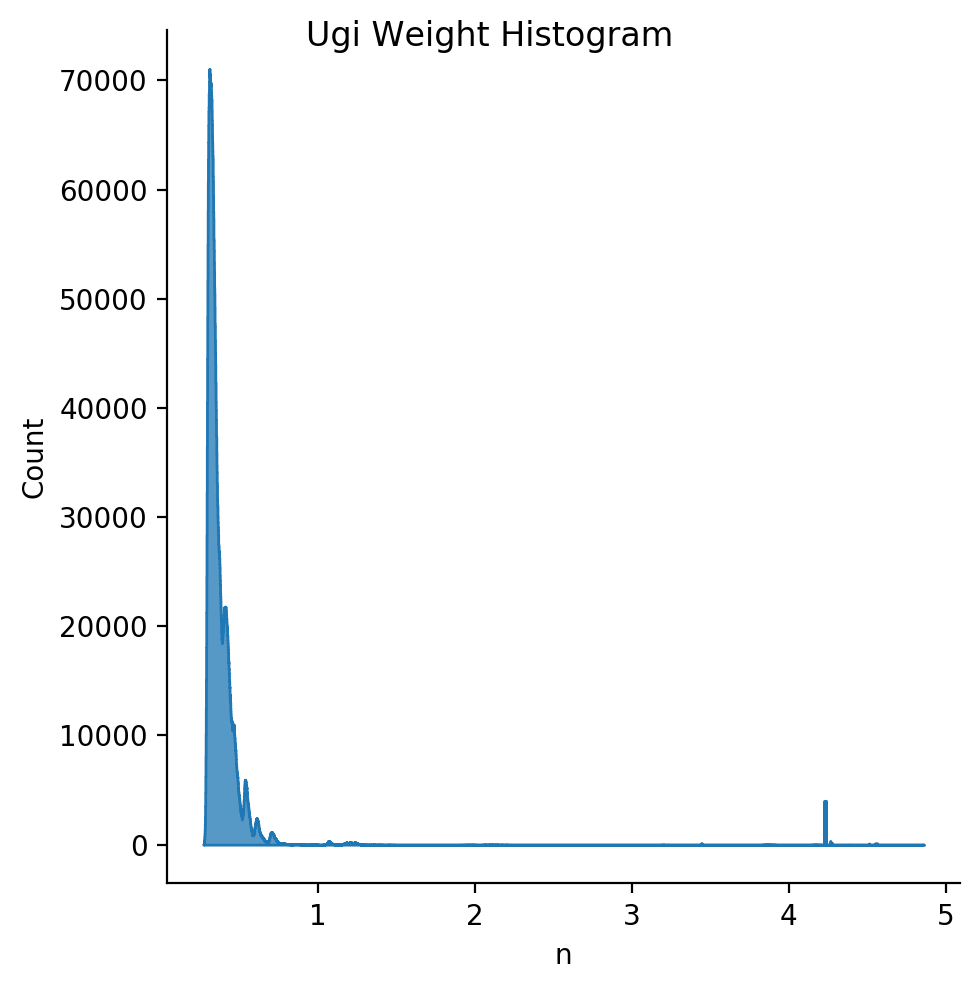

In [38]:
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200


df['weight'] = 200*(1/df['counts']-0.047)

print(np.mean(df.weight))
# df['weight'] = 1/(acid_counts[df['acid']].values*
#                            amine_counts[df['amine']].values*
#                            aldehyde_counts[df['aldehyde']].values*
#                            isocyanide_counts[df['isocyanide']].values)

# df['log_weight'] = 1/(np.log10(acid_counts[df['acid']].values*
#                            amine_counts[df['amine']].values*
#                            aldehyde_counts[df['aldehyde']].values*
#                            isocyanide_counts[df['isocyanide']].values))

fig = sns.displot(df.weight, element="step").fig
# fig = sns.displot(df.log_weight, element="step").fig
# fig = sns.displot(df.counts, element="step", log_scale=True).fig
# ax = fig.gca()
plt.xlabel('n')
# ax.set_xlim(left=0.05)
fig.suptitle('Ugi Weight Histogram')

In [40]:
# print(df)
ind_df = df.set_index('ugi_ind')
# print(test_df)
# print(df.iloc[-9481:].reset_index())
# print(test_df.loc[7493742:])
# assert df.iloc[-9481:].reset_index() == df.iloc[7493742:].reset_index()

In [41]:
ind_df = ind_df[['smiles','dock_score', 'weight']]
ind_df.to_csv('ugis_weighted_all.csv', index=False)

ind_df.loc[:7493742].to_csv('ugis_weighted_split.csv', index=False)

In [27]:
print(np.min(df.log_weight))

0.052729019501177636


In [13]:
from scipy import stats

print(stats.mode(df.weight))
print(statsnpmode(df.weight))

ModeResult(mode=array([0.06812802]), count=array([4018]))
